In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('50_Startups.csv')

In [ ]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


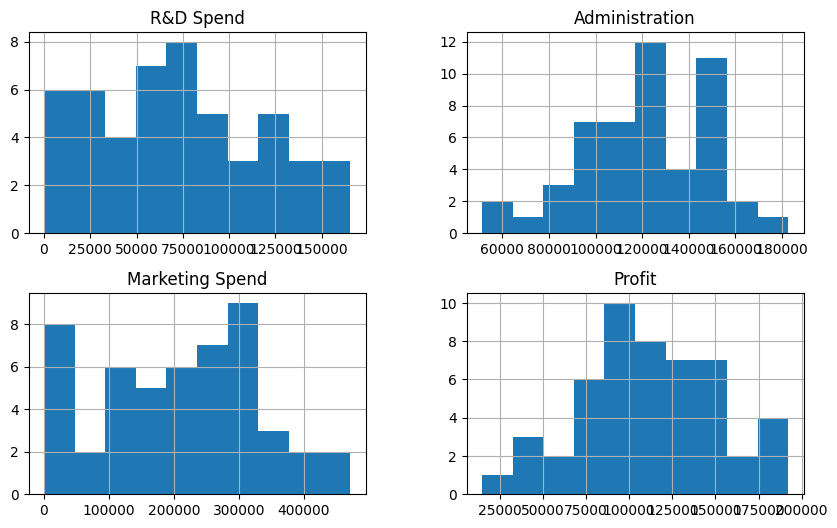

In [ ]:
# prompt: generate histogram using suitable bin size and figsize

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data.hist(bins=10, figsize=(10,6))
plt.show()

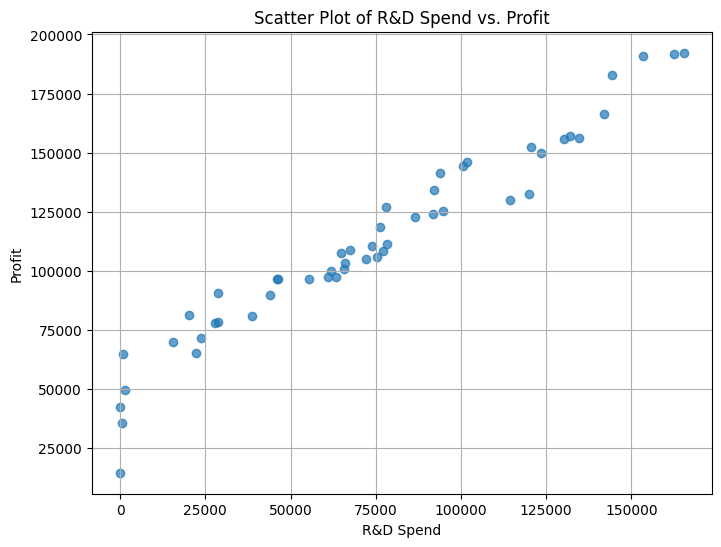

In [ ]:
# prompt: Generate a suitable scatter plt diagram for the given data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

data = pd.read_csv('50_Startups.csv')

# Assuming 'R&D Spend' and 'Profit' are the columns you want to plot
plt.figure(figsize=(8, 6))
plt.scatter(data['R&D Spend'], data['Profit'], alpha=0.7)
plt.title('Scatter Plot of R&D Spend vs. Profit')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.grid(True)
plt.show()


# Example of scatter matrix for multiple columns
#scatter_matrix(data[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']], alpha=0.2, figsize=(10, 10), diagonal='kde')
#plt.show()

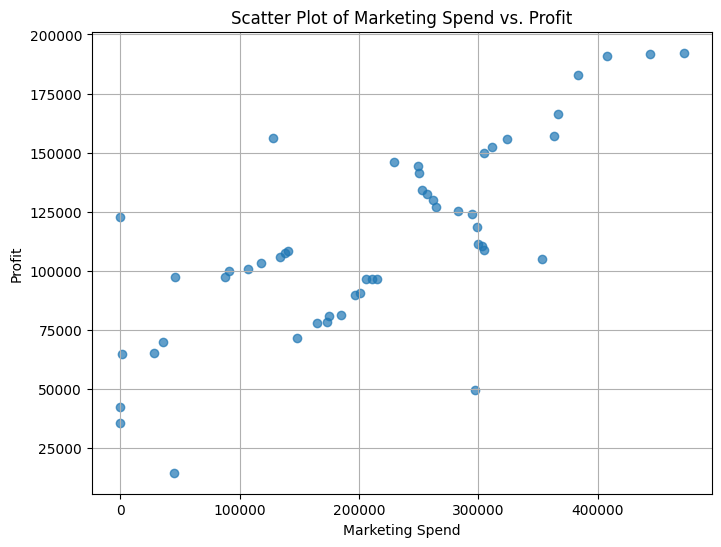

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Marketing Spend'], data['Profit'], alpha=0.7)
plt.title('Scatter Plot of Marketing Spend vs. Profit')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

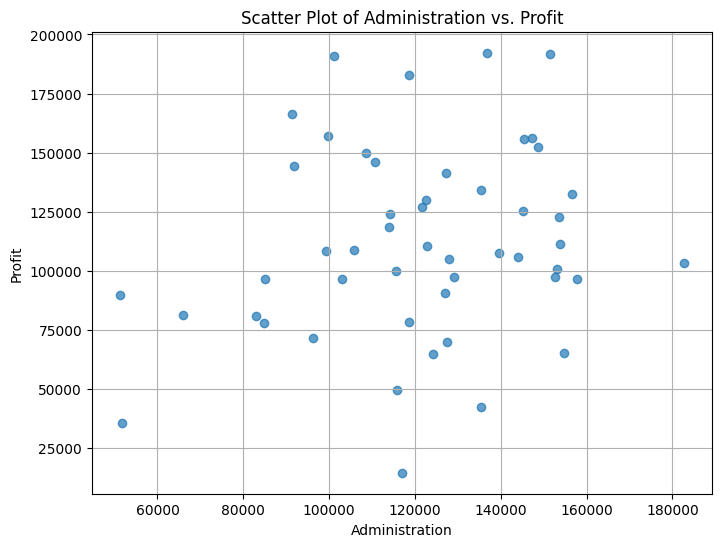

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Administration'], data['Profit'], alpha=0.7)
plt.title('Scatter Plot of Administration vs. Profit')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

In [ ]:
data.isna().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


In [ ]:
data.dtypes

,0
R&D Spend,float64
Administration,float64
Marketing Spend,float64
State,object
Profit,float64


In [ ]:
X = data[["R&D Spend"]]
y = data["Profit"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train.values,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
# Assuming X_train, y_train, and X_test are already defined
lr = LinearRegression()  # Initialize the model
lr.fit(X_train, y_train) # Fit the model using the training data
y_pred = lr.predict(X_test) # Now you can predict

In [ ]:
r2_score( y_test, y_pred)

0.9265108109341951

In [ ]:
print(lr.intercept_)

49336.6680379911


In [ ]:
#checking the prediction
lr.predict(X[0:1])

array([190480.25107829])

In [ ]:
type(lr)

sklearn.linear_model._base.LinearRegression

In [ ]:
import pickle

In [ ]:
# save
with open('model.pkl','wb') as f:
    pickle.dump(lr,f)

In [ ]:
# load
with open('model.pkl', 'rb') as f:
    clf2 = pickle.load(f)

In [ ]:
X[0:5]

,R&D Spend
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [ ]:
clf2.predict(X[0:5])

array([190480.25107829, 188131.54561896, 180315.73844483, 172574.27208786,
       170640.7877067 ])

In [ ]:
# Display the first few predictions alongside the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())

       Actual      Predicted
13  134307.35  127862.209964
39   81005.76   82250.563346
30   99937.59  102255.720782
45   64926.08   50190.473476
17  125370.37  130136.881905


In [ ]:
# prompt: Interpret the result of the above code

The code performs a linear regression analysis on a dataset named '50_Startups.csv'. Let's break down the key steps and their interpretations:

1. **Data Loading and Exploration:**
   - The code loads the dataset using pandas.
   - It then generates histograms of each numerical feature to visualize their distributions.
   - Scatter plots are created to show the relationship between 'R&D Spend', 'Marketing Spend', 'Administration' and 'Profit'.  These plots help visually assess potential linear correlations.
   - It checks for missing values (NaNs) and displays the data types of each column.

2. **Data Preparation:**
   - The independent variable (X) is set as 'R&D Spend' and the dependent variable (y) as 'Profit'.
   - The data is split into training and testing sets using `train_test_split` (80% training, 20% testing).  `random_state=42` ensures reproducibility of the split.

3. **Model Training:**
   - A linear regression model (`LinearRegression`) is initialized and trained using the training data.

4. **Model Evaluation:**
   - Predictions are made on the test data (`y_pred`).
   - The R-squared score is calculated to evaluate the model's performance. R-squared represents the proportion of variance in the dependent variable that is predictable from the independent variable(s). A higher R-squared generally indicates a better fit.
   - The model's intercept is printed.
   - A prediction is made for the first data point of the dataset
   - The type of the trained model is printed.


5. **Model Persistence:**
   - The trained model is saved to a file named 'model.pkl' using `pickle`. This allows the model to be loaded and reused later without retraining.

6. **Model Loading and Prediction:**
   - The saved model is loaded from 'model.pkl'.
   - Predictions are made on the first 5 data points in the dataset using the loaded model to demonstrate the model loading capabilities.

7. **Prediction Comparison:**
   - A DataFrame is created to display the first few actual values of the target variable ('Profit') from the test set alongside the predicted values from the model.

**Interpretation of Results:**

- The histograms and scatter plots provide a preliminary understanding of the data distribution and relationships between variables.  You'll be able to see if there are any obvious linear trends.
- The R-squared value indicates the goodness of fit of the linear regression model. A value closer to 1 suggests a strong linear relationship between 'R&D Spend' and 'Profit'.
- The intercept represents the predicted value of 'Profit' when 'R&D Spend' is 0.
- The comparison between predicted and actual values in the DataFrame offers a direct assessment of the model's predictive accuracy on unseen data.  Look at how close the 'Predicted' and 'Actual' columns are.

**Potential Improvements:**

- Consider using multiple features (like 'Marketing Spend' and 'Administration') as independent variables to potentially improve the model's accuracy.  Explore other regression techniques as well.
- Check for multicollinearity (high correlation between independent variables), which can affect the reliability of coefficients in multiple linear regression.
- More advanced model evaluation metrics (e.g., Mean Absolute Error, Mean Squared Error) can provide a more complete picture of model performance.
